In [55]:
import numpy as np
horizon = 2000
k = 4
explorationSteps = 1000
arm_1_values = np.random.normal(loc = 0.3 , scale =1 ,size = int(horizon/4))
arm_1_mean = arm_1_values.mean()
print(arm_1_mean)
arm_2_values = np.random.normal(loc = 0.5 , scale =1 ,size = int(horizon/4))
arm_2_mean = arm_2_values.mean()
print(arm_2_mean)
arm_3_values = np.random.normal(loc = 0.7 , scale =1 ,size = int(horizon/4))
arm_3_mean = arm_3_values.mean()
print(arm_3_mean)
arm_4_values = np.random.normal(loc = 0.8 , scale =1 ,size = int(horizon/4))
arm_4_mean = arm_4_values.mean()
print(arm_4_mean)

0.25900199094105153
0.5045235929917887
0.6916077101704992
0.8233263753753938


In [53]:
exploitation = horizon - explorationSteps

In [42]:
sampleMeans = [arm_1_mean,arm_2_mean,arm_3_mean,arm_4_mean]
xAxis = ['arm_1','arm_2','arm_3','arm_4']

Text(0, 0.5, 'sample means')

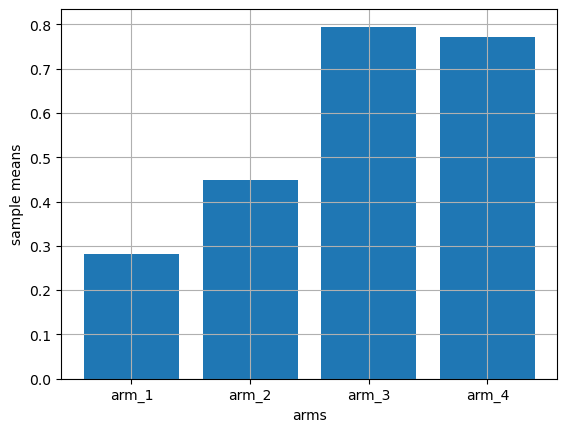

In [43]:
import matplotlib.pyplot as plt
plt.grid(True)
plt.bar(xAxis,sampleMeans)
plt.xlabel('arms')
plt.ylabel('sample means')

In [44]:
bestArmMean = max(sampleMeans)

In [45]:
bestArmMean

0.7945351986539891

In [46]:
reward = arm_1_values.sum() + arm_2_values.sum()+ arm_3_values.sum() + arm_4_values.sum() + (exploitation*bestArmMean)

In [47]:
print(reward)

1368.6185869737574


In [48]:
optimalReward = 0.8*horizon
optimalReward

1600.0

In [49]:
regret = optimalReward - reward
regret

231.38141302624263

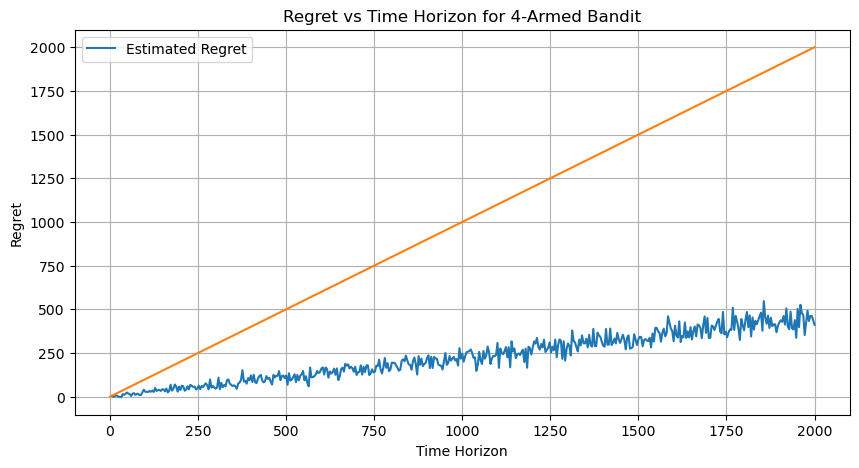

In [60]:
import numpy as np
import matplotlib.pyplot as plt

horizonRange = range(4, 2001, 4)
regretValues = []

for horizon in horizonRange:
    optimalReward = 0.8 * horizon  # best possible reward: always pulling arm with mean 0.8

    # Exploration: pull each arm horizon/4 times
    arm_1_values = np.random.normal(loc=0.3, scale=1, size=horizon // 4)
    arm_2_values = np.random.normal(loc=0.5, scale=1, size=horizon // 4)
    arm_3_values = np.random.normal(loc=0.7, scale=1, size=horizon // 4)
    arm_4_values = np.random.normal(loc=0.8, scale=1, size=horizon // 4)

    # Compute sample means from exploration phase
    sampleMeans = [
        arm_1_values.mean(),
        arm_2_values.mean(),
        arm_3_values.mean(),
        arm_4_values.mean()
    ]

    # Exploitation: pull the best arm for the remaining horizon
    bestArmMean = max(sampleMeans)
    exploitation = horizon - (4 * (horizon // 4))  # remaining steps after exploring all 4 arms equally
    reward = (
        arm_1_values.sum()
        + arm_2_values.sum()
        + arm_3_values.sum()
        + arm_4_values.sum()
        + exploitation * bestArmMean
    )

    regret = optimalReward - reward
    regretValues.append(regret)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(horizonRange, regretValues, label='Estimated Regret')
plt.plot([0,2000],[0,2000])
plt.xlabel('Time Horizon')
plt.ylabel('Regret')
plt.title('Regret vs Time Horizon for 4-Armed Bandit')
plt.grid(True)
plt.legend()
plt.show()


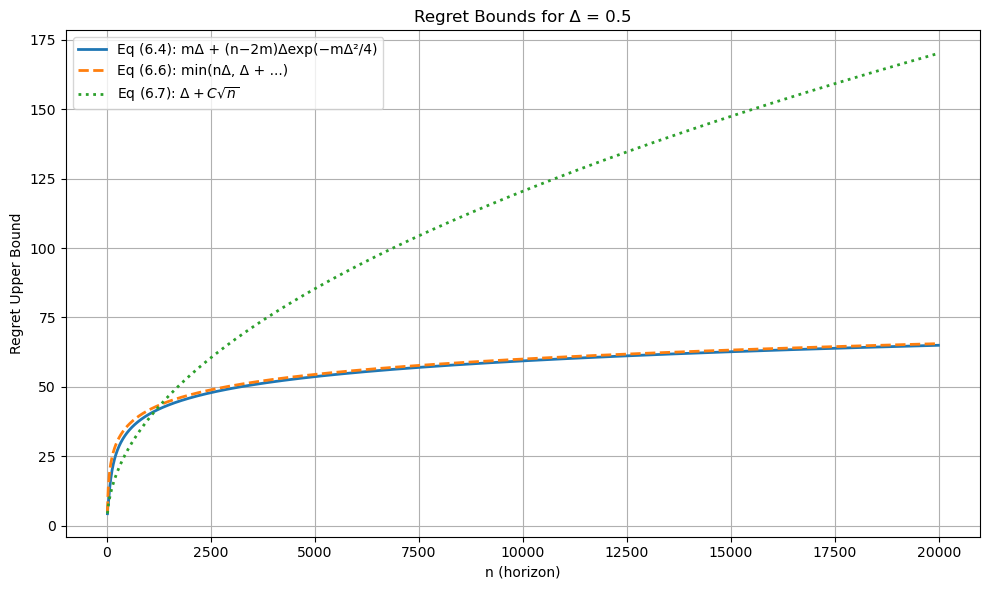

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
delta = 0.5  # Change this to try different ∆
n_vals = np.arange(10, 20000, 10)

# Eq (6.5): Optimal m
def optimal_m(n, delta):
    val = (4 / delta**2) * np.log((n * delta**2) / 4)
    return np.maximum(1, val)

# Eq (6.4): Regret bound
def regret_bound(n, delta):
    m = optimal_m(n, delta)
    bound = m * delta + (n - 2 * m) * delta * np.exp(-m * delta**2 / 4)
    return bound

# Eq (6.6): Alternative bound
def regret_alt_bound(n, delta):
    return np.minimum(n * delta, delta + (4 / delta) * (1 + np.maximum(0, np.log((n * delta**2) / 4))))

# Eq (6.7): Square-root bound with some C
def regret_sqrt_bound(n, delta, C=1.2):
    return delta + C * np.sqrt(n)

# Compute regrets
regret1 = regret_bound(n_vals, delta)
regret2 = regret_alt_bound(n_vals, delta)
regret3 = regret_sqrt_bound(n_vals, delta)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(n_vals, regret1, label="Eq (6.4): mΔ + (n−2m)Δexp(−mΔ²/4)", linewidth=2)
plt.plot(n_vals, regret2, label="Eq (6.6): min(nΔ, Δ + ...)", linewidth=2, linestyle="--")
plt.plot(n_vals, regret3, label=r"Eq (6.7): $\Delta + C\sqrt{n}$", linewidth=2, linestyle=":")
plt.title(f"Regret Bounds for Δ = {delta}")
plt.xlabel("n (horizon)")
plt.ylabel("Regret Upper Bound")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
